In [6]:
import torch
import numpy as np
import pandas as pd
import anndata
import scanpy as sc
import matplotlib.pyplot as plt

In [7]:
latent = np.loadtxt("latent.txt")
latent

array([[-0.49422614,  0.06824225, -0.00273012, ..., -1.07327743,
        -0.32560505, -1.04118339],
       [ 2.02732898, -0.53459906,  1.04743932, ..., -0.14824267,
        -0.44804508,  1.39925649],
       [ 1.08617131,  1.3151687 ,  0.11681829, ..., -0.30243662,
        -1.66809383,  0.04640006],
       ...,
       [ 1.15488293, -0.48629627, -0.99672758, ...,  0.82553864,
         0.3900816 , -0.49574429],
       [ 1.00689209,  0.42820858, -1.10499222, ...,  0.79195467,
         0.3730904 ,  1.51435743],
       [-0.55469084,  1.75551039,  1.61352682, ...,  0.48552234,
         0.89605854, -0.23191856]])

In [8]:
labels = np.zeros((1, latent.shape[0]), dtype=np.int32)
labels

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32)

/home/zyuan/.local/share/virtualenvs/virtualenv-nmx37veW/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


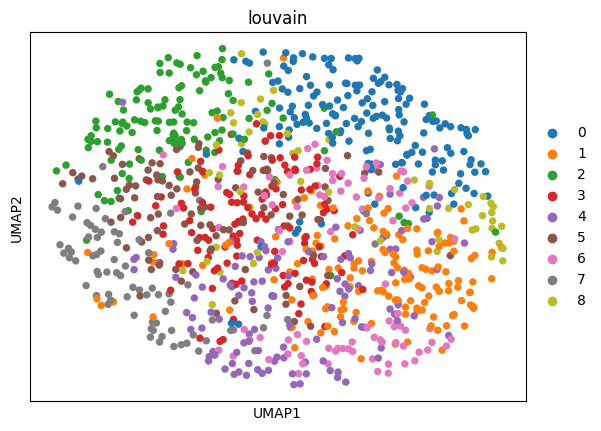

/home/zyuan/.local/share/virtualenvs/virtualenv-nmx37veW/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/zyuan/.local/share/virtualenvs/virtualenv-nmx37veW/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


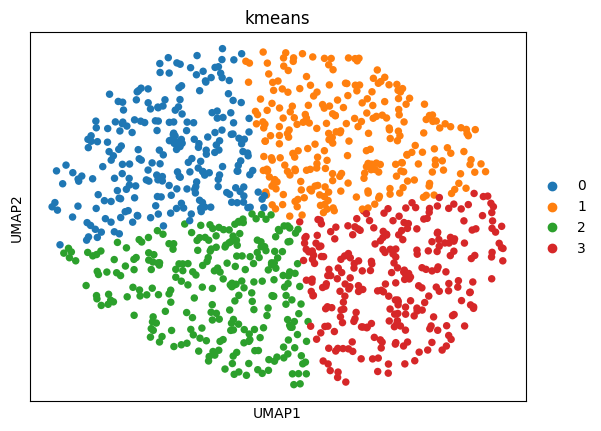

In [9]:
%matplotlib inline
# visulization
prior_adata = anndata.AnnData(X=latent)
prior_adata.obsm["X_multi_vi"] = latent
prior_adata.obs['cell_type'] = torch.tensor(labels.reshape(-1,1))
sc.pp.neighbors(prior_adata, use_rep="X_multi_vi", n_neighbors=30)
sc.tl.umap(prior_adata, min_dist=0.3)

# cluster by louvain
sc.tl.louvain(prior_adata, resolution=1)   
sc.pl.umap(prior_adata, color=['louvain'])
plt.show()

# cluster by kmeans
from sklearn.cluster import KMeans
latent_code = prior_adata.obsm["X_umap"]

kmeans = KMeans(n_clusters=4, random_state=0).fit(latent_code) 
prior_adata.obs['kmeans'] = kmeans.labels_.astype(str)
sc.pl.umap(prior_adata, color=['kmeans'])